# Perfil de velocidad de Blasius

En clases derivamos la ecuación de Blasius para el perfil de velocidad dentro de la capa límite sobre una placa plana:

\begin{equation}
f'''+\frac{1}{2}ff''=0
\end{equation}

donde sabemos que

\begin{align}
f'(\eta) = \frac{u}{U_\infty}\\
\eta = y\left(\frac{U_\infty}{\nu x}\right)^{1/2}
\end{align}

y las condiciones de borde

\begin{align}
f'(0) = 0\\
f'(\infty) = 1\\
f(0) = 0
\end{align}

En $\eta$, la coordenada $x$ corre paralela a la placa plana e $y$ perpendicular a esta.



## Espesor de capa límite a partir de la ecuación de Blasius

La derivación de Blasius nos dejó con una ecuación diferencial ordinaria de tercer orden, donde la función $f$ depende de solamente una variable ($\eta$). A continuación presentamos un pequeño código que integra la ecuación diferencial numéricamente (utilizando método de Euler de primer orden), para encontrar la solución para $f$, y, por ende, $f'$ y $u(y)$.

El método de Euler integra numéricamente de la siguiente manera

\begin{equation}
F^{n+1} = F^n + h F'^n
\end{equation}

Escribamos una función que haga la iteración de Euler

In [5]:
import numpy

def Euler(F, N, h):
    for i in range(N):
        k1 = h * f_prima(F[i,:])
        F[i+1,:] = F[i,:] + k1
    
    return F

En este caso, $F$ será el vector

\begin{equation}
F = \left(
\begin{array}{c}
f\\
f'\\
f''\\
\end{array}
\right)
\end{equation}

por lo que $F'$ es

\begin{equation}
F' = \left(
\begin{array}{c}
f'\\
f''\\
f'''\\
\end{array}
\right)
\end{equation}

Pero por la ecuación de Blasius, podemos escribir $f'''=-\frac{1}{2}ff''$, y $F'$ queda

\begin{equation}
F' = \left(
\begin{array}{c}
f'\\
f''\\
-\frac{1}{2}ff''\\
\end{array}
\right)
\end{equation}

In [6]:
def f_prima(F):
    return numpy.array([F[1], F[2], -F[2]*F[0]/2])

La ecuación de Blasius es de tercer orden y tenemos tres condiciones de contorno, por lo que deberíamos ser capaces de resolver la ecuación, sin embargo, una de esas condiciones está situada al "final" de nuestra evaluación. Para resolver este problema numéricamente usaremos la técnica de *shooting*: buscar la condición de contorno en $f''(0)$ tal que se cumpla la condición $f'(\infty) = 1$. 

El punto $\eta\to\infty$ está lejos de la placa. Consideremos que $\eta=10$ ya está suficientemente lejos, y $f(10)\approx1$.

Con prueba y error (no muy eficiente!) llegamos a que la condición de contorno $f''(0)=0.3152$ cumple con $f(10)\approx1$.

In [7]:
L = 10.
N = 100
n = 3

U_inf = 1.

a = 0
b = L
h = (b-a)/N

z = numpy.arange(a,b+h,h)
F = numpy.zeros((N+1, n))

F[0,:] = [0., 0., 0.3152]

F = Euler(F,N,h)

u = F[:,1]*U_inf

print r'eta u'
for i in range(N+1):
    print '{0} {1}'.format(z[i], u[i])

eta u
0.0 0.0
0.1 0.03152
0.2 0.06304
0.3 0.09456
0.4 0.126075032448
0.5 0.157575164589
0.6 0.189045510204
0.7 0.220466259337
0.8 0.251812734501
0.9 0.283055481717
1.0 0.31416040437
1.1 0.345088947384
1.2 0.375798338445
1.3 0.406241892038
1.4 0.436369380728
1.5 0.466127476599
1.6 0.495460263848
1.7 0.524309821418
1.8 0.5526168722
1.9 0.580321492768
2.0 0.607363875009
2.1 0.633685128376
2.2 0.659228108991
2.3 0.683938259581
2.4 0.70776444233
2.5 0.73065974539
2.6 0.752582242999
2.7 0.773495689159
2.8 0.793370125551
2.9 0.812182385919
3.0 0.829916481543
3.1 0.846563855488
3.2 0.862123497089
3.3 0.8766019123
3.4 0.890012950117
3.5 0.902377489857
3.6 0.913722998585
3.7 0.924082972108
3.8 0.933496276568
3.9 0.942006410506
4.0 0.949660709325
4.1 0.956509515146
4.2 0.962605335177
4.3 0.96800201096
4.4 0.972753919169
4.5 0.976915222318
4.6 0.980539184767
4.7 0.983677566119
4.8 0.986380100578
4.9 0.988694067255
5.0 0.990663953065
5.1 0.992331206663
5.2 0.99373407921
5.3 0.99490754547
5.4 0.9958

Fíjense que $u=0.99U_\infty$ en $\eta=5$. Por lo tanto, en ese punto $y=\delta$ y quedamos con 

\begin{equation}
\frac{\delta}{x}=\frac{5}{\left(\frac{U_\infty x}{\nu}\right)^{1/2}} = \frac{5}{\sqrt{Re_x}} 
\end{equation}

Grafiquemos el perfil de velocidad en $x=0.1$, $x=1$ y $x=2$, y comparémoslo con von Kármán. Como recordatorio, sabemos que von Kármán asume un perfil parabólico de velocidad dentro de la capa límite

\begin{equation}
u = U_\infty\left(\frac{2y}{\delta} - \frac{y^2}{\delta^2}\right)
\end{equation}

y encuentra un espesor de capa límite

\begin{equation}
\frac{\delta}{x} = \frac{5.5}{\sqrt{Re_x}} 
\end{equation}

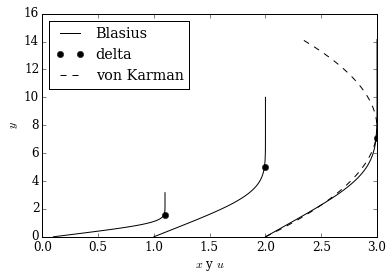

In [23]:
from matplotlib import pyplot
%matplotlib inline
pyplot.rcParams['font.family'] = 'serif'
pyplot.rcParams['font.size'] = 12

nu = 1
x1 = 0.1
x2 = 1.
x3 = 2.

# Espesor de Blasius
y1 = z * numpy.sqrt(nu*x1/U_inf)
y2 = z * numpy.sqrt(nu*x2/U_inf)
y3 = z * numpy.sqrt(nu*x3/U_inf)

# Espesor de capa limite
delta1 = 5 * numpy.sqrt(nu*x1/U_inf)
delta2 = 5 * numpy.sqrt(nu*x2/U_inf)
delta3 = 5 * numpy.sqrt(nu*x3/U_inf)

# Espesor y perfil de von Karman
delta_vK = x3*5.5/numpy.sqrt(U_inf*x3/nu)
u_vK = U_inf*(2*y3/delta_vK-y3**2/delta_vK**2)


pyplot.plot(u+x1,y1,c='k',ls='-')
pyplot.plot(u+x2,y2,c='k',ls='-')
pyplot.plot(u+x3,y3,c='k',ls='-', label='Blasius')
pyplot.plot(x1+U_inf, delta1, c='k', marker='o',ls='')
pyplot.plot(x2+U_inf, delta2, c='k', marker='o',ls='')
pyplot.plot(x3+U_inf, delta3, c='k', marker='o',ls='',label='delta')

pyplot.plot(u_vK+x3,y3,c='k',ls='--',label='von Karman')

pyplot.xlabel(r'$x$ y $u$')
pyplot.ylabel(r'$y$')
pyplot.legend(loc='best')
#pyplot.savefig('capa_limite_blasius.pdf')
pyplot.show()

En esta gráfica podemos ver el perfil de Blasius para $x=0.1$, $x=1$ y $x=2$ en línea sólida, puntos negros donde termina la capa límite ($y=\delta$), en línea punteada el perfil parabólico de von Kármán para el caso $x=5$. Podemos ver que dentro de la capa límite, el perfil parabólico se aproxima a la solución de Blasius bastante bien.